In [73]:
import ee
ee.Authenticate()

Enter verification code:  4/1AX4XfWgD5_NZPQIruX7yQvHuiwdXicJGQQs2GtwUAo7_aOritYx7twxpnnE

Successfully saved authorization token.


In [74]:
%load_ext autoreload

%autoreload 2

from pathlib import Path
from FireHR.data import *
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
left = 9.8815
top = 37.0065
right = 10.481
bottom = 36.6065

path_save = Path('./download_18/')
products = ['COPERNICUS/S2_SR']
bands = ['B4', 'B3', 'B2']

R = RegionST(name = 'Tunisia',
             bbox = [ 10.1865,36.7665, 10.205, 36.8065],
             scale_meters = 5,
             time_start = '2021-03-01',
             time_end = '2021-04-25')

time_window = R.times[0], R.times[-1]

download_data(R, time_window, products, bands, path_save, use_least_cloudy=3, show_progress=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


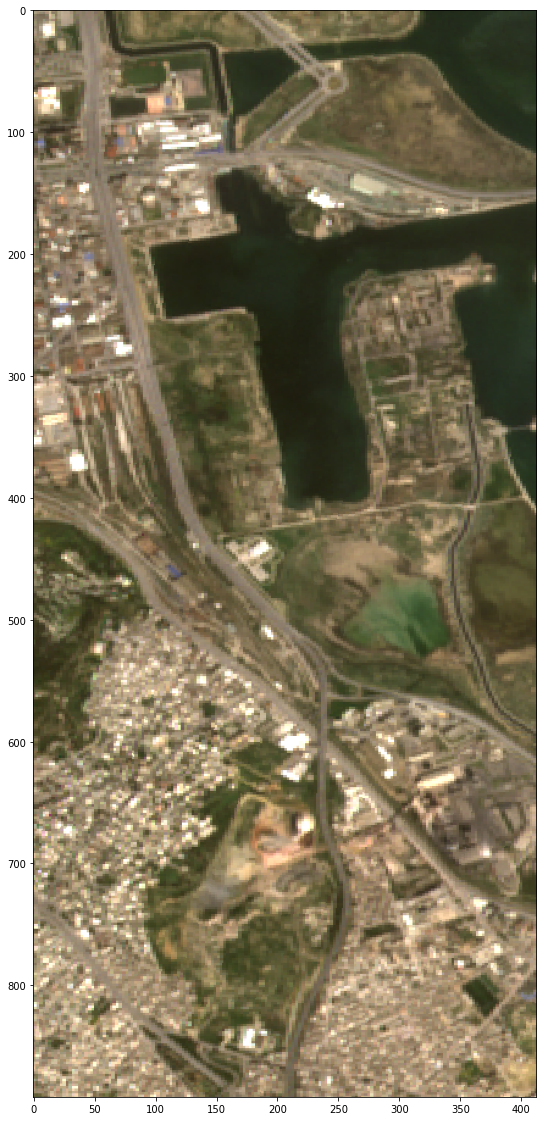

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from banet.data import open_tif


brightness = 3
im = np.concatenate([open_tif(f'./download_18/download.{b}.tif').read() for b in bands])
im = im.transpose(1, 2, 0).astype(np.float64)/10000
plt.figure(figsize = (20,20))
plt.imshow(brightness*im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


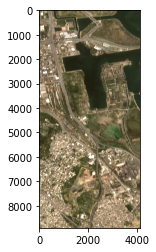

In [64]:
#plt.figure(figsize = (20,20))
plt.imshow(brightness*im)

In [72]:
import matplotlib
matplotlib.image.imsave('asdf.png', im)